In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.system("gcc -O0 mmm.c")

y_1 = []
x_list = np.arange(100, 1501, 100)
for x in x_list:
    os.system("./a.out " + str(x) + " > out.txt")
    with open('out.txt') as f:
        lines = f.readlines()
        y_1.append(float(lines[2].split(None, 1)[0]))
        print(y_1[-1])
        f.close()
y_1 = np.array(y_1)
y_1 = 2*(x_list**3) / y_1

9784892.0
83369958.0
264978270.0
599658444.0
1160746338.0
2000583656.0
3232911516.0
4845238188.0
7047563092.0
10224734044.0
12794249748.0
16685136766.0
21864957048.0
27044892722.0
32400105772.0


In [3]:
os.system("gcc -O3 -fno-tree-vectorize mmm.c")

y_2 = []
for x in x_list:
    os.system("./a.out " + str(x) + " > out.txt")
    with open('out.txt') as f:
        lines = f.readlines()
        y_2.append(float(lines[2].split(None, 1)[0]))
        print(y_2[-1])
        f.close()
y_2 = np.array(y_2)
y_2 = 2*(x_list**3) / y_2

3012959.0
28095414.0
99679716.0
245027836.0
487593336.0
841822392.0
1368901226.0
2076320648.0
3000885200.0
4149395610.0
5548903222.0
7218742308.0
9217558984.0
11508038394.0
14229459850.0


In [4]:
os.system("gcc -O3 -ffast-math -march=native mmm.c")

y_3 = []
for x in x_list:
    os.system("./a.out " + str(x) + " > out.txt")
    with open('out.txt') as f:
        lines = f.readlines()
        y_3.append(float(lines[2].split(None, 1)[0]))
        print(y_3[-1])
        f.close()
y_3 = np.array(y_3)
y_3 = 2*(x_list**3) / y_3

808971.0
6881691.0
25223665.0
61050917.0
122636656.0
237273970.0
423278718.0
673389502.0
1017992766.0
1433239314.0
1938558712.0
2482975510.0
3210782492.0
4027268054.0
4825597894.0


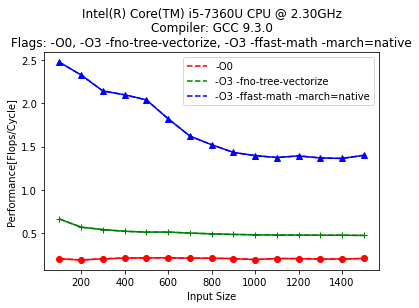

In [5]:
l1 = plt.plot(x_list, y_1, 'r--', label='-O0')
l2 = plt.plot(x_list, y_2, 'g--', label='-O3 -fno-tree-vectorize')
l3 = plt.plot(x_list, y_3, 'b--', label='-O3 -ffast-math -march=native')
plt.plot(x_list, y_1, 'ro-', x_list, y_2, 'g+-', x_list, y_3, 'b^-')
plt.title('Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz\nCompiler: GCC 9.3.0\nFlags: -O0, -O3 -fno-tree-vectorize, -O3 -ffast-math -march=native')
plt.xlabel('Input Size')
plt.ylabel('Performance[Flops/Cycle]')
plt.legend()
plt.show()